In [8]:
import pandas as pd
import numpy as np
import os
from os.path import dirname, join
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
#stop runtime error
np.seterr(divide='ignore', invalid='ignore')
rcParams['figure.figsize'] = 15, 18
__FILE__ = '/home/kenneth/Documents/GIT_PROJECTS/DATA-MINING-AND-INSGIGHT-EXPLORATION/' 
DATASET_ = join(dirname(__FILE__), 'DATASET')

hosue_df = pd.read_csv(join(DATASET_, 'Villas For Sale.csv'))
#drop na values
hosue_df.dropna(inplace = True)
if 'Create Time' in hosue_df.columns:
  hosue_df.rename(columns = {'Create Time': 'date'}, inplace = True)
  hosue_df.date = pd.to_datetime(hosue_df.date, unit = 's')
  hosue_df.sort_values(by = 'date', inplace = True)
  hosue_df.set_index(['date'], inplace = True)


In [4]:
hosue_df.head(5)

,District_id,Area m2,Price,With Images,Bed Rooms,Apartments,Living Rooms,WC,Street Width,With Stairs,...,Servant Room,Pool,Furnished,Tent,Backyard,Kitchen,Extra Unit,Car Entrance,Basement,Lift
date,,,,,,,,,,,,,,,,,,,,,
2016-03-28 08:57:32,392,300.0,485000,1,3.0,0,1,3.0,10.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2016-03-28 09:10:47,706,410.0,2200000,1,5.0,2,3,5.0,20.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2016-03-28 09:27:01,694,200.0,1250000,1,4.0,0,2,3.0,20.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2016-03-28 09:34:38,648,245.0,660000,0,4.0,0,1,3.0,20.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2016-03-28 10:26:39,414,375.0,950000,1,5.0,0,2,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


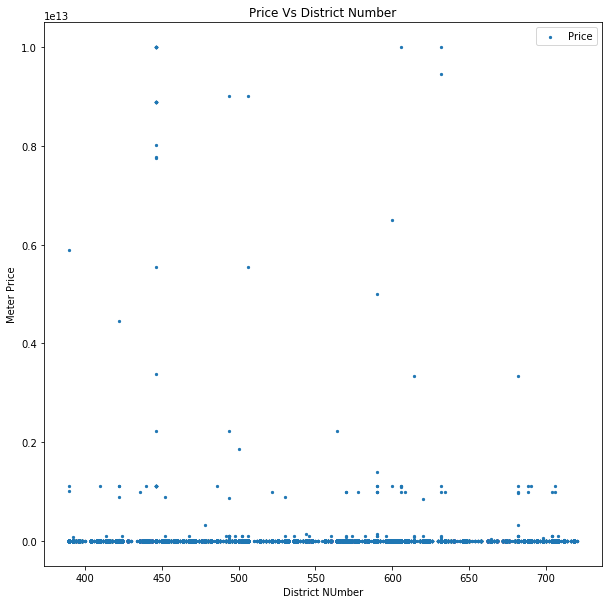

In [27]:
rcParams['figure.figsize'] = 10, 10
plt.scatter(hosue_df.District_id, hosue_df.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

### Explanation for Skewness and Kurtosis

#### Positive Skewness: means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

#### Negative Skewness: is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

###### Area
###### Price
###### Apartments
###### Living Rooms
###### Street Width
###### Age
###### Pool
###### Furnished
###### Basement and Lift all have positive skew, meaning their average and median values is more than the highest occuring value. so it would be better to remove this mode values to balance the dataset.

##### The soution to balancing the data is removing outliers and that we would consider at later stage of the project

In [18]:
print('See data description: {}'.format(hosue_df.describe()))
print('Skew of data: {}'.format(hosue_df.skew()))
print('Kurt of data: {}'.format(hosue_df.kurt()))


See data description:          District_id       Area m2         Price    With Images  \
count  156485.000000  1.564850e+05  1.564850e+05  156485.000000   
mean      572.999840  1.525738e+05  2.656382e+09       0.870007   
std        97.277814  1.551792e+07  1.403750e+11       0.336297   
min       390.000000  0.000000e+00  1.000000e+00       0.000000   
25%       486.000000  3.150000e+02  9.500000e+05       1.000000   
50%       590.000000  3.900000e+02  1.250000e+06       1.000000   
75%       682.000000  4.650000e+02  1.750000e+06       1.000000   
max       720.000000  2.147480e+09  1.000000e+13       1.000000   

           Bed Rooms     Apartments   Living Rooms             WC  \
count  156485.000000  156485.000000  156485.000000  156485.000000   
mean        4.552117       1.253481       2.074454       4.408339   
std         0.829863       1.304234       1.130427       0.855093   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       0.

###### Data looks unevenly distributed from the histogram. A mix of positive and negativly skewed features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1db96b7828>,
      dtype=object)

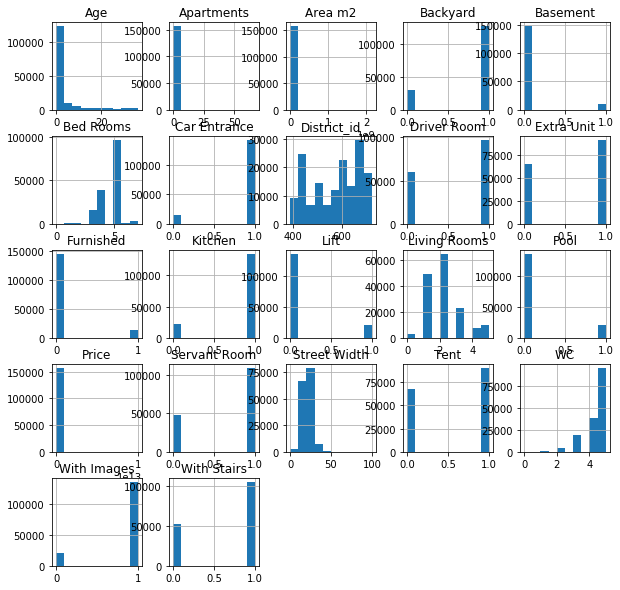

In [19]:
hosue_df.hist()

In [20]:
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in df.columns:
    if df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


In [22]:
df_standard.head(5)

,District_id,Area m2,Price,With Images,Bed Rooms,Apartments,Living Rooms,WC,Street Width,With Stairs,...,Servant Room,Pool,Furnished,Tent,Backyard,Kitchen,Extra Unit,Car Entrance,Basement,Lift
date,,,,,,,,,,,,,,,,,,,,,
2016-03-28 08:57:32,-1.860655,-0.009813,-0.018920,0.386544,-1.870335,-0.961089,-0.950488,-1.647007,-1.449542,-1.409482,...,-1.505898,-0.398966,-0.300862,0.864095,0.482590,0.413274,0.847478,0.32368,-0.255438,-0.394359
2016-03-28 09:10:47,1.367224,-0.009806,-0.018908,0.386544,0.539709,0.572383,0.818760,0.691928,0.241658,0.709480,...,0.664056,-0.398966,-0.300862,0.864095,0.482590,0.413274,0.847478,0.32368,-0.255438,-0.394359
2016-03-28 09:27:01,1.243866,-0.009819,-0.018915,0.386544,-0.665313,-0.961089,-0.065864,-1.647007,0.241658,0.709480,...,0.664056,-0.398966,-0.300862,-1.157280,-2.072151,0.413274,-1.179972,0.32368,-0.255438,-0.394359
2016-03-28 09:34:38,0.770992,-0.009816,-0.018919,-2.587026,-0.665313,-0.961089,-0.950488,-1.647007,0.241658,-1.409482,...,-1.505898,-0.398966,-0.300862,-1.157280,0.482590,0.413274,-1.179972,0.32368,-0.255438,-0.394359
2016-03-28 10:26:39,-1.634498,-0.009808,-0.018917,0.386544,0.539709,-0.961089,-0.065864,0.691928,-0.603942,-1.409482,...,-1.505898,-0.398966,-0.300862,-1.157280,0.482590,0.413274,0.847478,0.32368,-0.255438,-0.394359


In [23]:
log_data.head(5)

,District_id,Area m2,Price,With Images,Bed Rooms,Apartments,Living Rooms,WC,Street Width,With Stairs,...,Servant Room,Pool,Furnished,Tent,Backyard,Kitchen,Extra Unit,Car Entrance,Basement,Lift
date,,,,,,,,,,,,,,,,,,,,,
2016-03-28 08:57:32,5.971262,5.703782,13.091904,0.0,1.098612,0.000000,0.000000,1.098612,2.302585,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-28 09:10:47,6.559615,6.016157,14.603968,0.0,1.609438,0.693147,1.098612,1.609438,2.995732,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-28 09:27:01,6.542472,5.298317,14.038654,0.0,1.386294,0.000000,0.693147,1.098612,2.995732,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-28 09:34:38,6.473891,5.501258,13.399995,0.0,1.386294,0.000000,0.000000,1.098612,2.995732,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-28 10:26:39,6.025866,5.926926,13.764217,0.0,1.609438,0.000000,0.693147,1.609438,2.708050,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


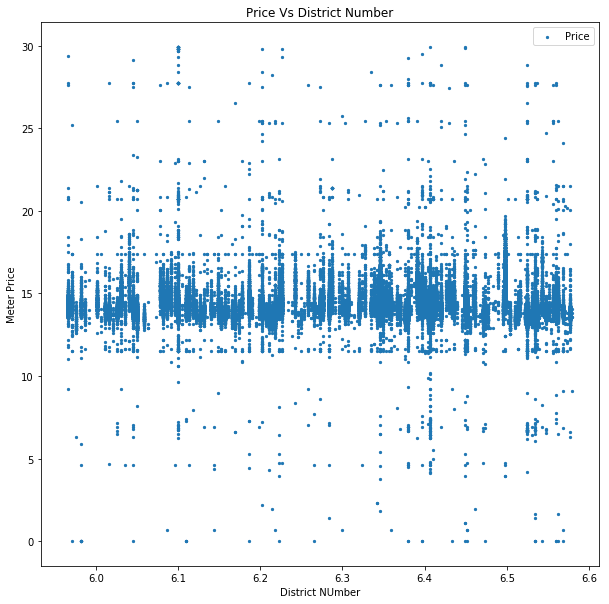

In [29]:
rcParams['figure.figsize'] = 10, 10
plt.scatter(log_data.District_id, log_data.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

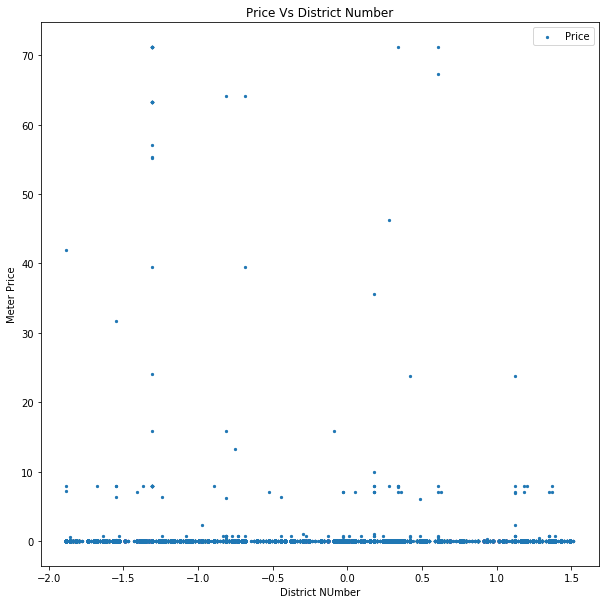

In [26]:
rcParams['figure.figsize'] = 10, 10
plt.scatter(df_standard.District_id, df_standard.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

#### Quite a few amount of data we should consider as outliers here. The red line is a boundary to better understand the huge deviation here.

Text(0.5, 1.0, 'Plot of count against price on a log scale')

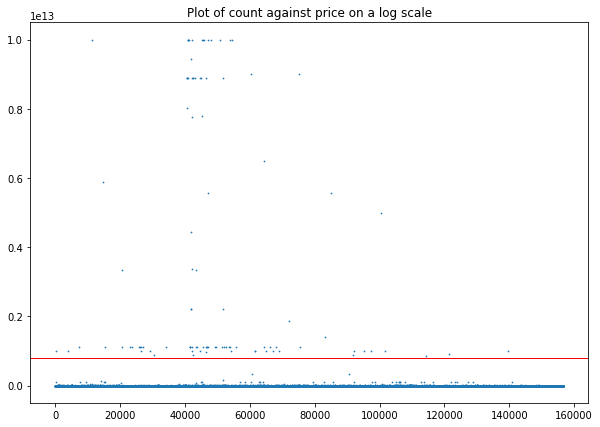

In [4]:
rcParams['figure.figsize'] = 10, 7
plt.scatter(np.arange(hosue_df.shape[0]), hosue_df.Price, s = .5)
plt.axhline(y = .08e13, linewidth=1, color='r')
plt.title('Plot of count against price on a log scale')

##### From the log_data it is evident we have outliers below and certain percentile and above a certain percentile

Text(0.5, 1.0, 'Plot of count against price on a log scale')

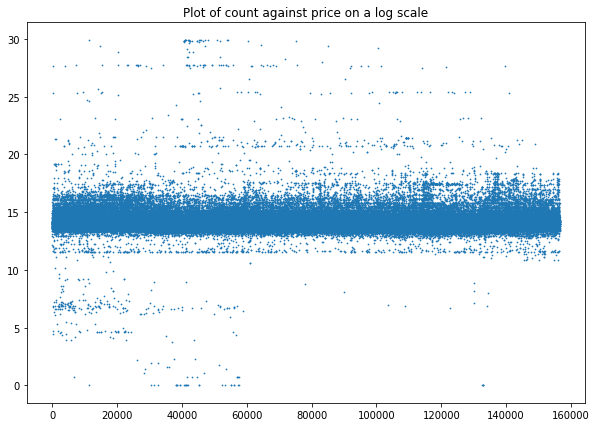

In [5]:
rcParams['figure.figsize'] = 10, 7
plt.scatter(np.arange(log_data.shape[0]), log_data.Price, s = .5)
plt.title('Plot of count against price on a log scale')

#### Even more clearly with a box plot, we can see the price outliers very clearly. Price and Area do share a huge amount of those outliers even for a log data

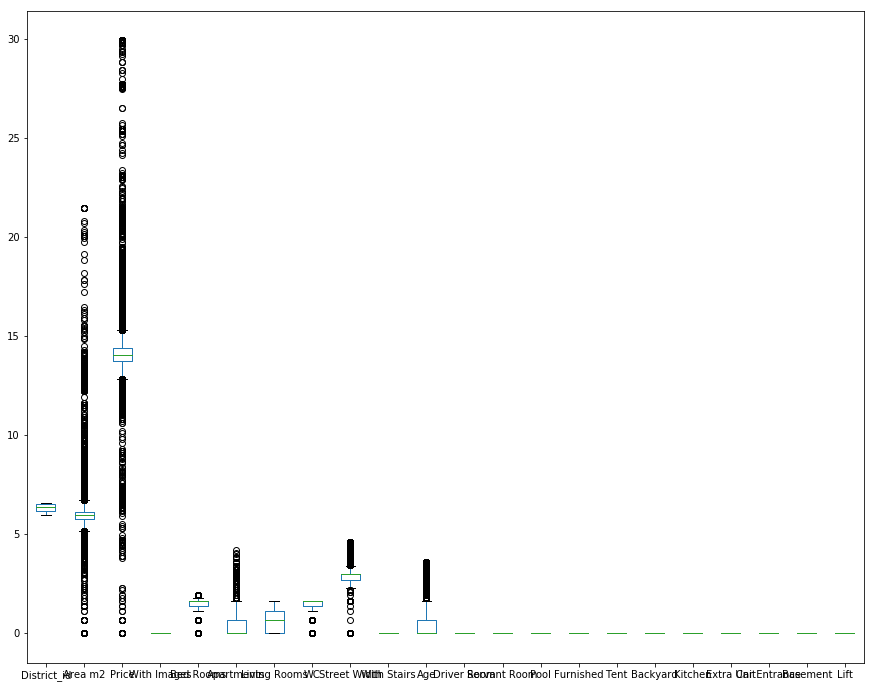

In [6]:
rcParams['figure.figsize'] = 15, 12
log_data.plot(kind='box')

<h3> CLUSTER ANALYSIS</h3>

In [32]:
from sklearn.cluster import AgglomerativeClustering, KMeans

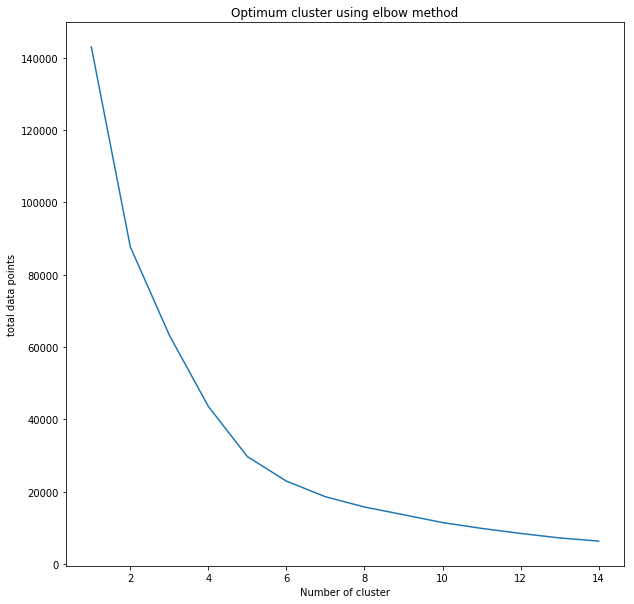

In [80]:
#finding optimum numbers of clusters/groupings
iterr = []
for i in range(1, 15):
    kmeans_ = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 500, n_init = 10, random_state = 0,
                    n_jobs = -1)
    kmeans_.fit(log_data[['District_id', 'Price']])
    #hier = AgglomerativeClustering(n_clusters=i, linkage='ward')
    iterr.append(kmeans_.inertia_)
plt.plot(range(1, 15), iterr)
plt.title('Optimum cluster using elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('total data points')
plt.show()

In [63]:
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 500, n_init = 10, random_state = 0,
                    n_jobs = -1)

In [76]:
y_means = kmeans_.fit_predict(log_data[['District_id', 'Price']])

In [73]:
y_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

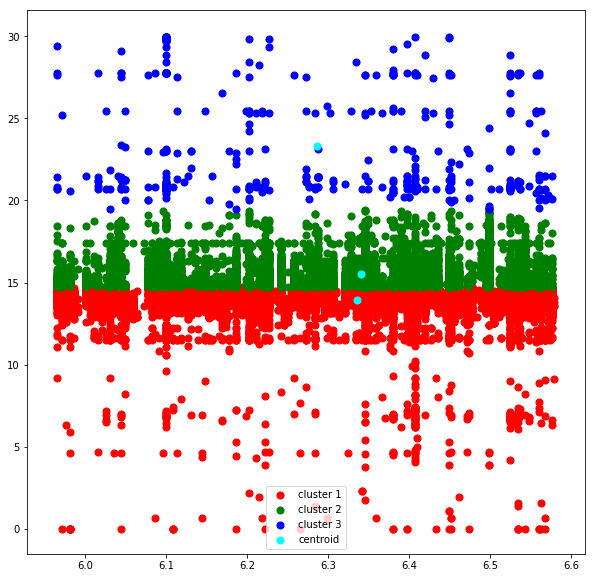

In [78]:
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 0, 0], log_data[['District_id', 'Price']].values[y_means == 0, 1], s = 50, c = 'red', label = 'cluster 1')
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 1, 0], log_data[['District_id', 'Price']].values[y_means == 1, 1], s = 50, c = 'green', label = 'cluster 2')
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 2, 0], log_data[['District_id', 'Price']].values[y_means == 2, 1], s = 50, c = 'blue', label = 'cluster 3')
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'centroid')
plt.legend()
plt.show()

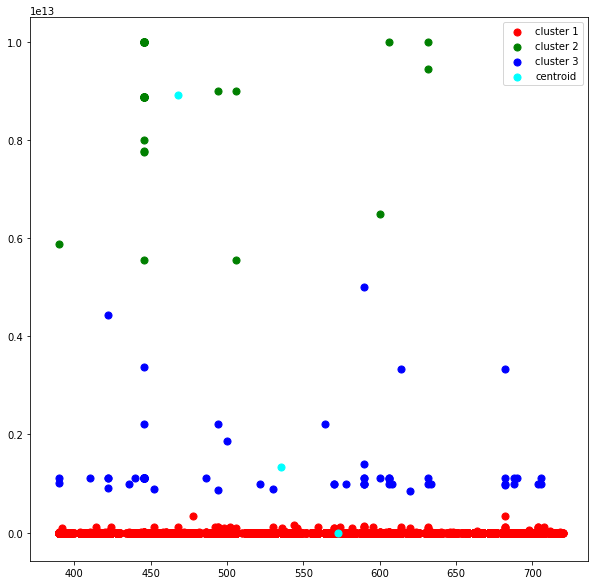

In [75]:
y_means = kmeans_.fit_predict(hosue_df[['District_id', 'Price']])
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 0, 0], hosue_df[['District_id', 'Price']].values[y_means == 0, 1], s = 50, c = 'red', label = 'cluster 1')
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 1, 0], hosue_df[['District_id', 'Price']].values[y_means == 1, 1], s = 50, c = 'green', label = 'cluster 2')
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 2, 0], hosue_df[['District_id', 'Price']].values[y_means == 2, 1], s = 50, c = 'blue', label = 'cluster 3')
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'centroid')
plt.legend()
plt.show()


#### CORRELATION HEATMAP

###### Houses with Pool most likely have a Basement and a Lift
###### Very high correlation between Price and houses with stairs..The higher the numbers of stairs in a house, the higher the prices of such houses.
###### Houses with Stairs most correlated with Pool and Lift. meaning houses with Stairs most like would have a pool and a lift
###### HIgh appartments numbers are correlated with areas with large street widths
###### HOuses with Extra units have high prices as they are highly correlated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f6c0286d8>,
      dtype=object)

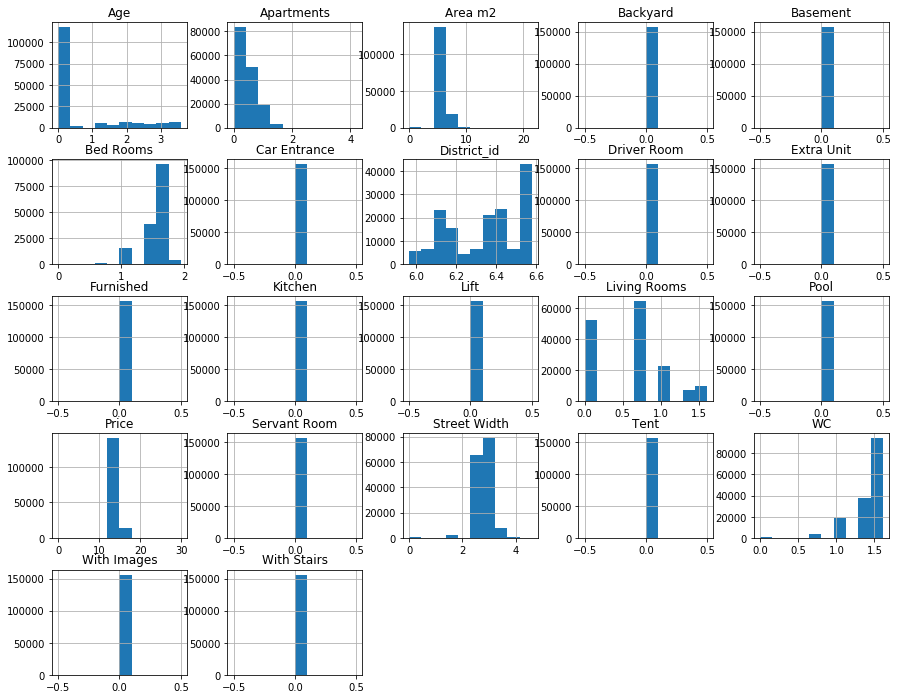

In [13]:
log_data.hist()

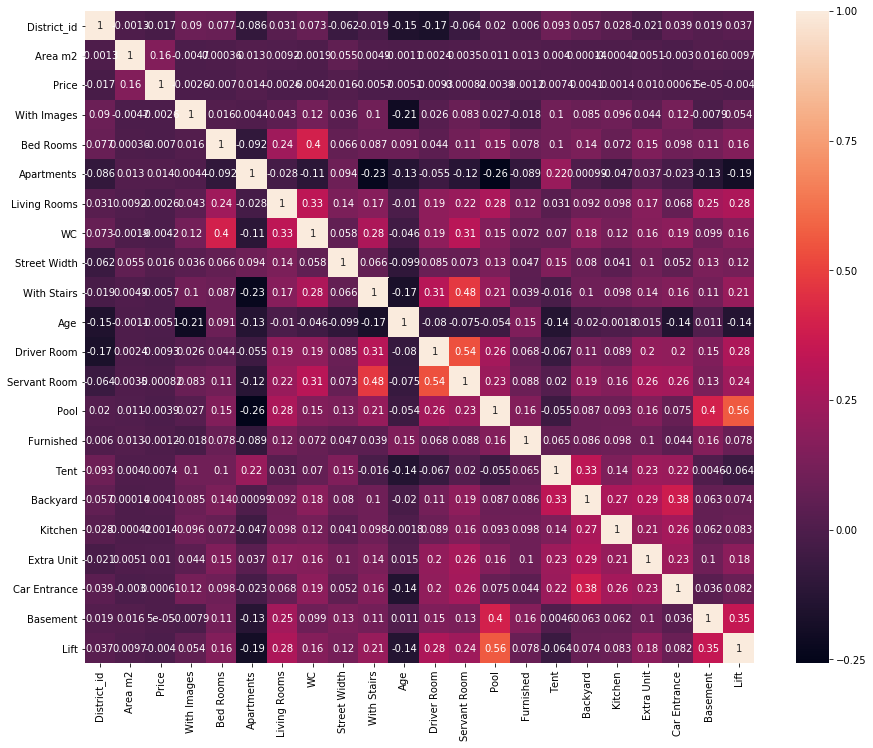

In [11]:
rcParams['figure.figsize'] = 15, 12
sns.heatmap(df_standard.corr(), annot=True);plt.show()

In [7]:
def remove_outliers(df, standardize = None, remove_objects = True,
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  #drop all objects
  #and leaving all float64 and int64 datatypes
  if remove_objects:
    for ii in df.columns:
      if df[ii].dtype == object:
        df = df.drop(ii, axis = 1)
  else:
    df = df
    df = pd.get_dummies(df, dtype = float)
    
    
    
  df = df.copy(deep = True)
  quart_1 = df.quantile(lower_quartile)
  quart_2 = df.quantile(upper_quartile)
  diff_quart = abs(quart_1 - quart_2)
  df = df[~((df < (quart_1 - 1.5 * diff_quart)) | (df > (quart_2 + 1.5 * diff_quart))).any(axis=1)]
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  else:
    pass
    
  return df

lower_quart = .25
upper_quart = .75
multiplier = 1.5
df_no_out = remove_outliers(hosue_df, remove_objects = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_standard_no_out = remove_outliers(hosue_df, remove_objects = True, standardize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
log_data_no_out = remove_outliers(hosue_df, remove_objects = True, logg=True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_normal_no_out = remove_outliers(hosue_df, remove_objects = True, normalize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


Text(0.5, 1.0, 'Count of District_id')

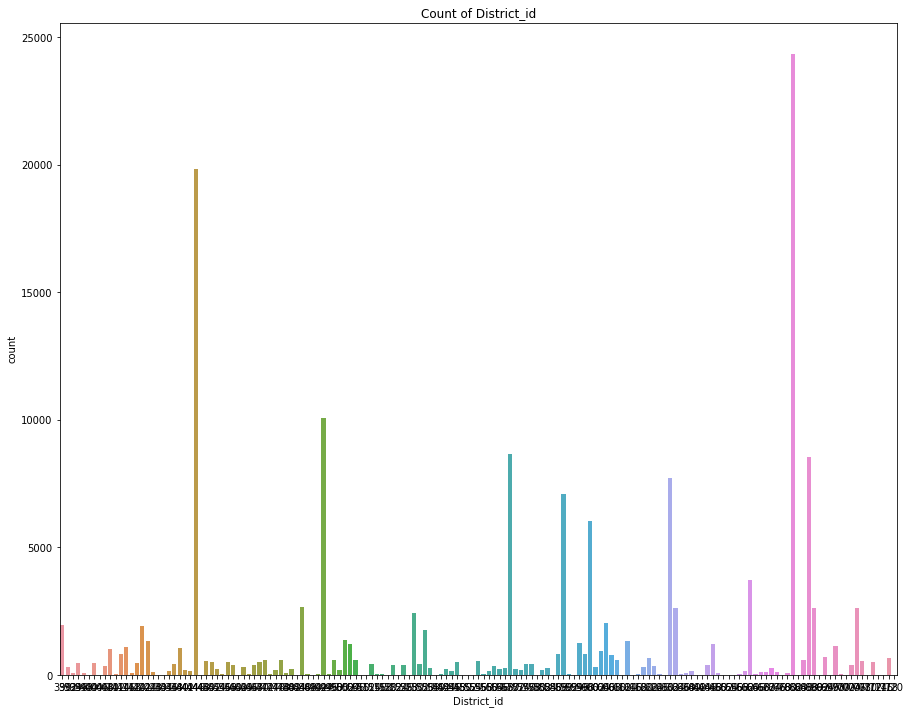

In [9]:
x = 'District_id'
sns.countplot(x = x, data = hosue_df)
plt.title('Count of %s'%x)

Text(0.5, 1.0, 'District_id count vs Bed Rooms')

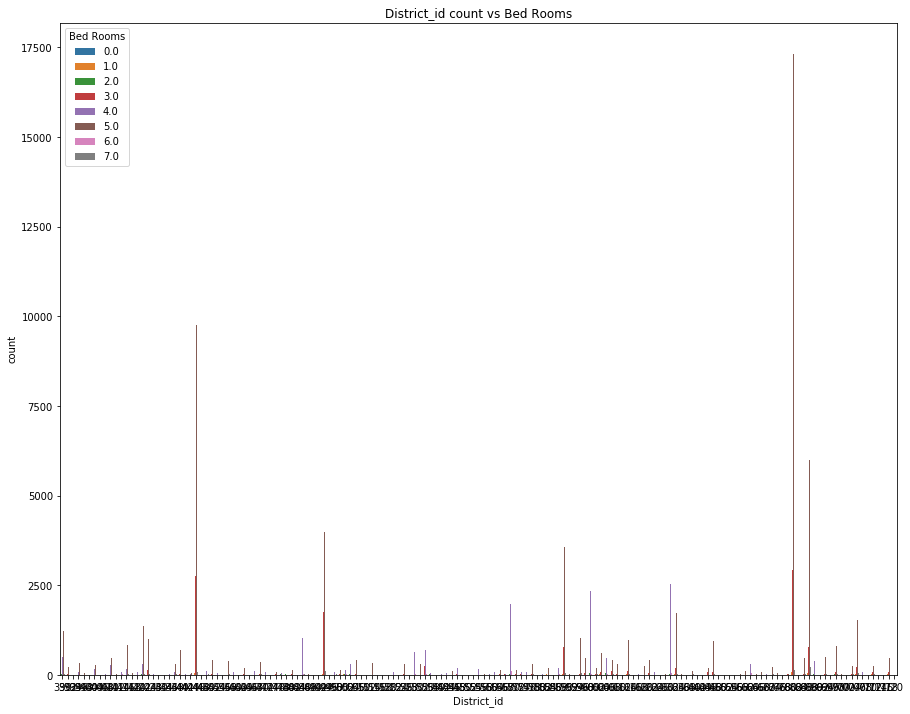

In [8]:
x = 'District_id'
y = 'Bed Rooms'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs With Images')

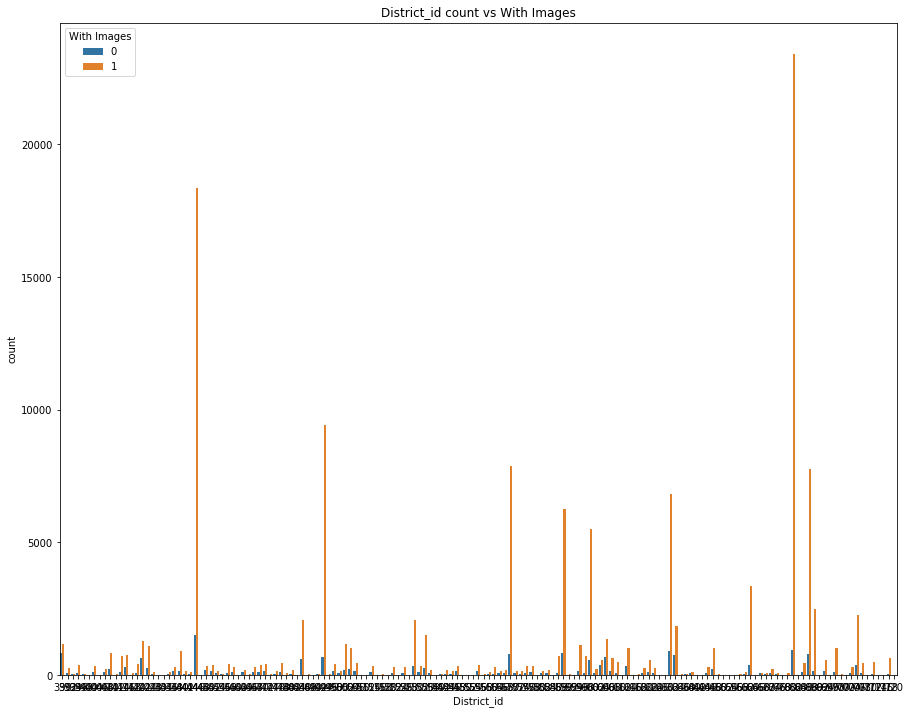

In [10]:
x = 'District_id'
y = 'With Images'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Living Rooms')

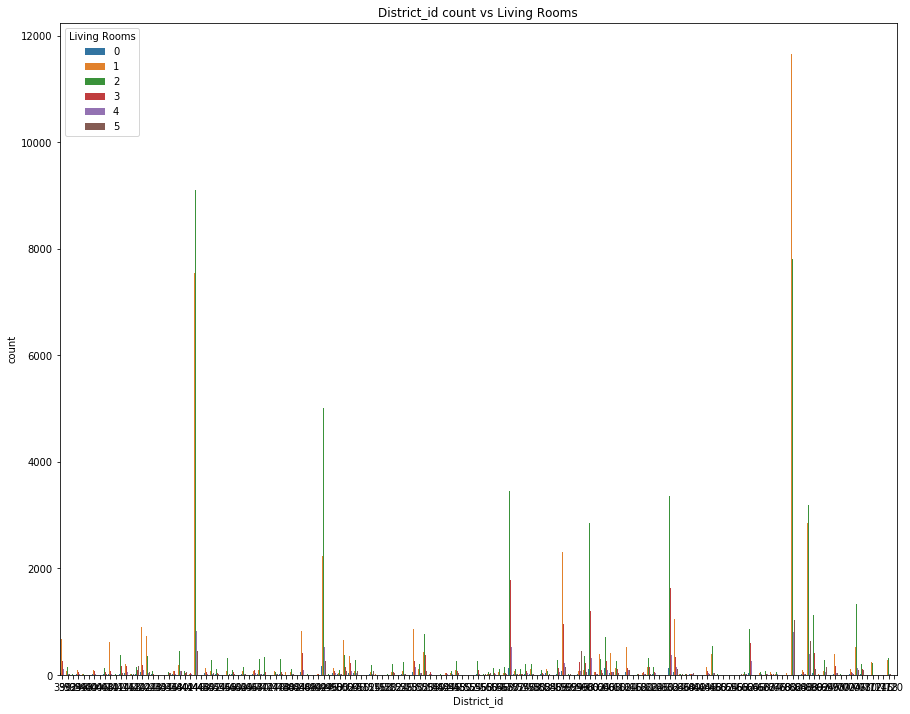

In [11]:
x = 'District_id'
y = 'Living Rooms'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Pool')

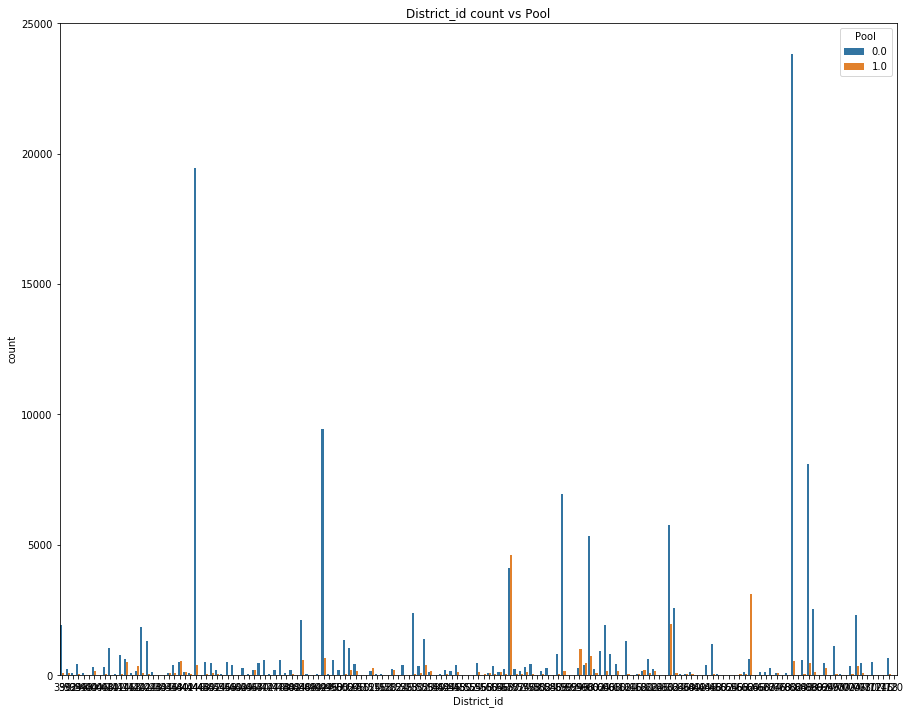

In [12]:
x = 'District_id'
y = 'Pool'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))


Text(0.5, 1.0, 'District_id count vs Furnished')

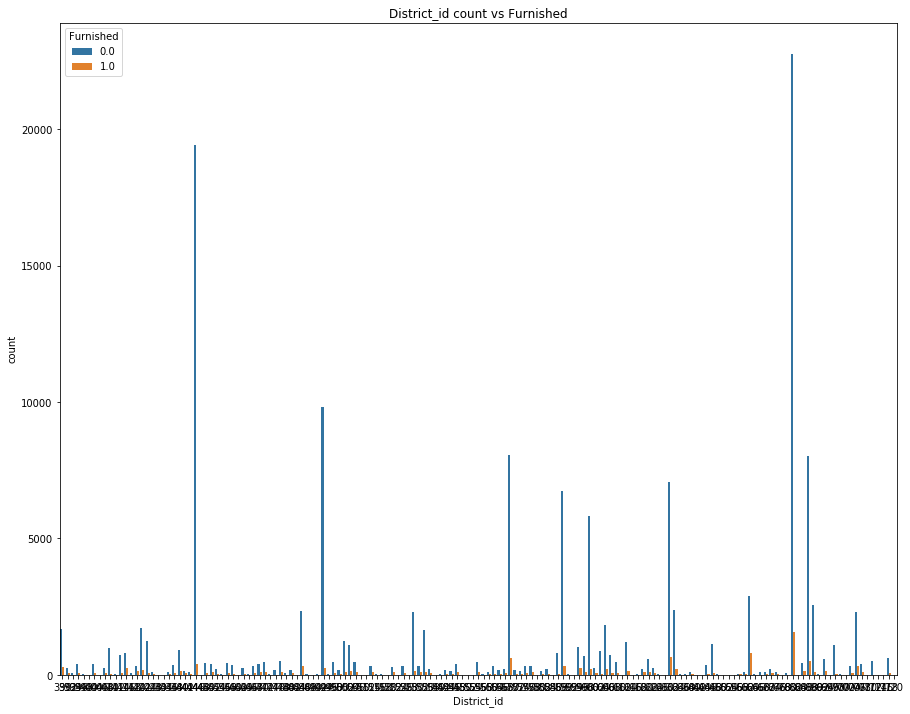

In [13]:
x = 'District_id'
y = 'Furnished'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))


Text(0.5, 1.0, 'District_id count vs Extra Unit')

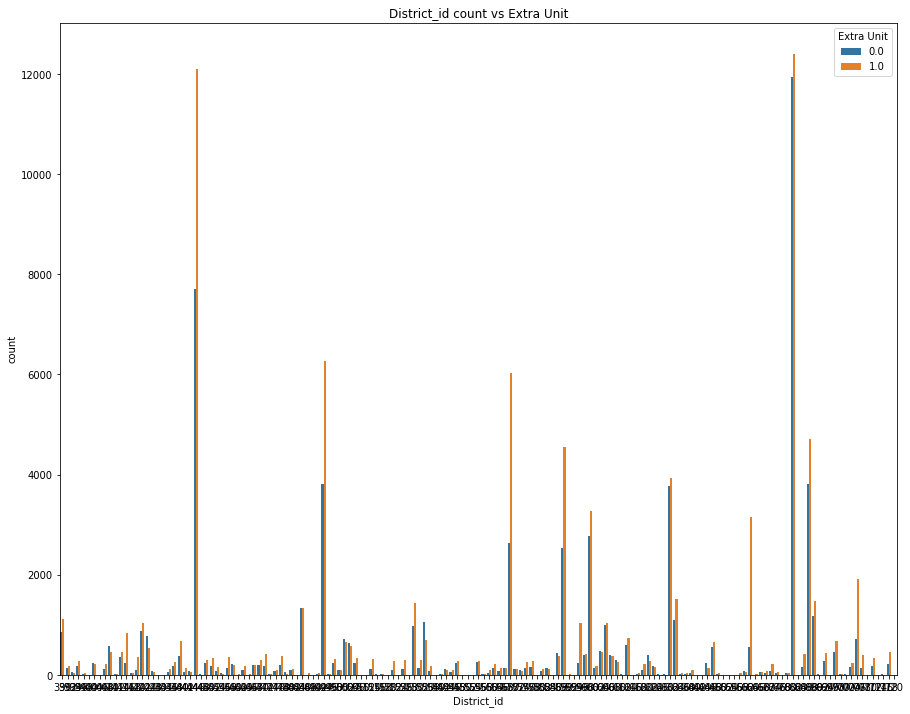

In [14]:
x = 'District_id'
y = 'Extra Unit'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Car Entrance')

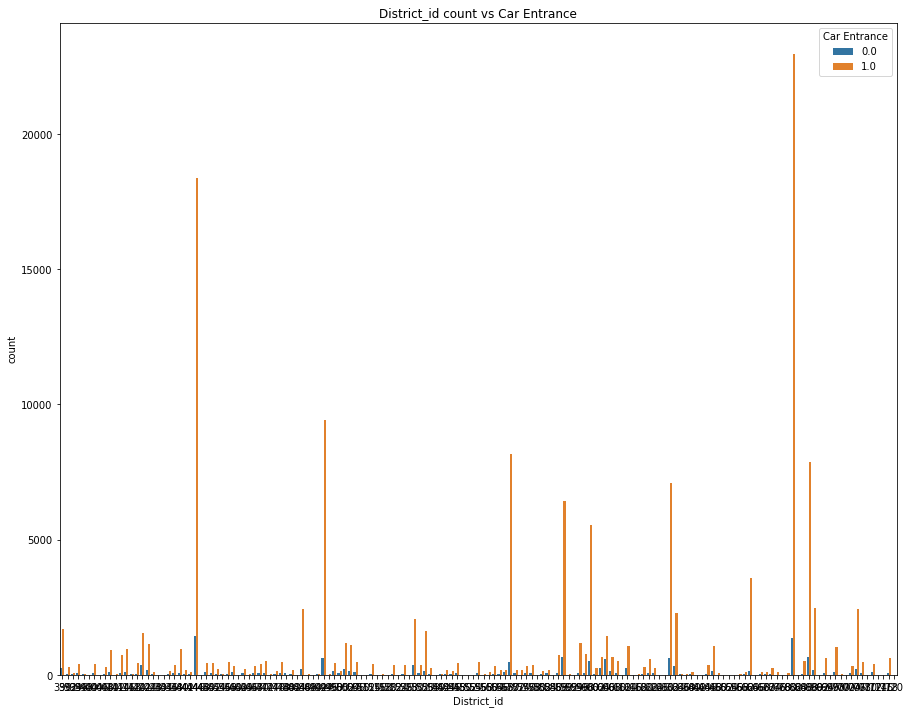

In [15]:
x = 'District_id'
y = 'Car Entrance'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Basement')

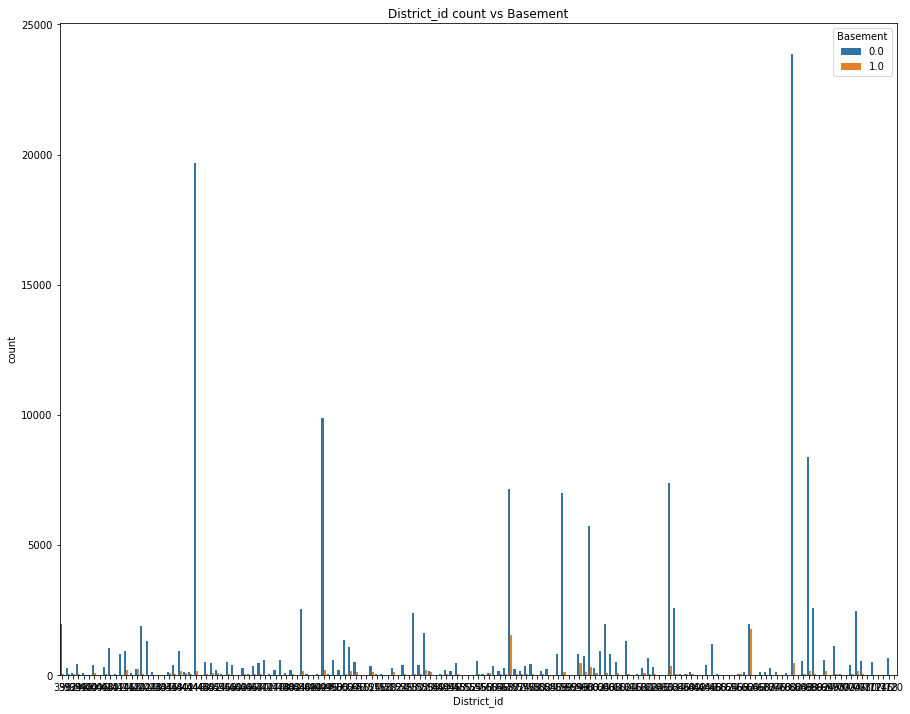

In [16]:
x = 'District_id'
y = 'Basement'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Lift')

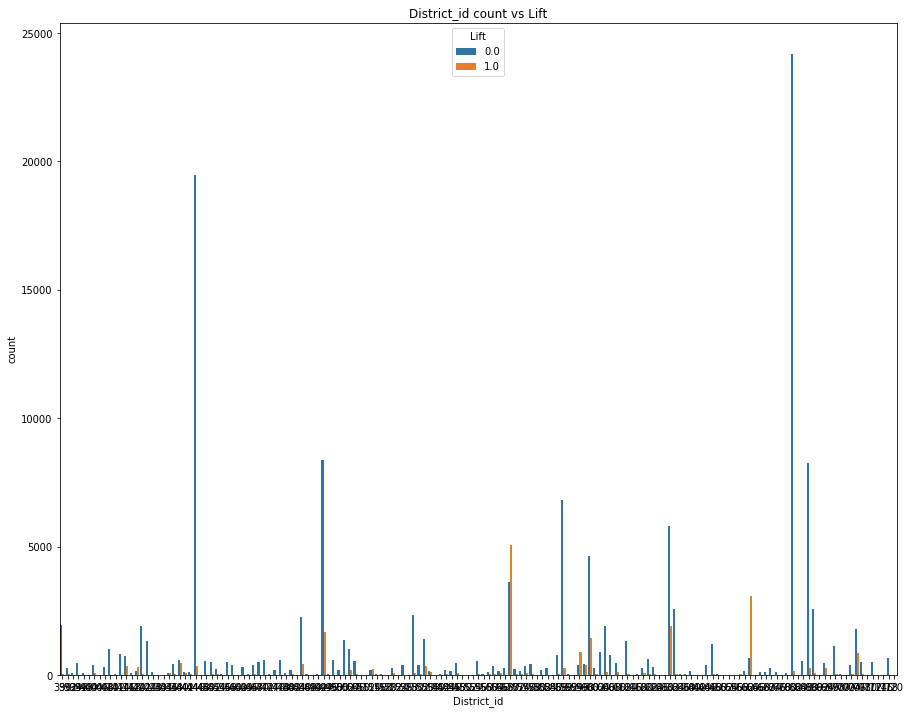

In [17]:
x = 'District_id'
y = 'Lift'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

### MOVING AVERAGE

In [16]:
#data exploration
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
def moving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({str(n)+'_day_average': df.rolling(n).mean()})

def expmoving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({'MA_'+str(n): df.ewm(n).mean()})

def plot_ma(df, n):
  ma_perd = moving_av(df.Price, n)
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex= True)
  ax1.plot(df.index, df.Price, lw = .5, color = color[1], label = 'Price')
  ax1.legend()
  ax2.plot(df.index, ma_perd, lw = .5, color = color[2], label = str(n)+'day_MA')
  ax2.legend()
  plt.title(str(n)+' day_Moving Average')
  
def plot_ma_all(df, n):
  ma = []
  for ii in n:
    ma.append(moving_av(df.Price, ii))
  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex= True)
  ax1.plot(df.index, df.Price, lw = .5, color = color[1], label = 'Price')
  ax1.legend()
  ax1.set_title('Price')
  ax2.plot(df.index, ma[0], lw = .5, color = color[2], label = str(30)+'day_MA')
  ax2.legend()
  ax2.set_title(str(30)+' day_Moving Average')
  ax3.plot(df.index, ma[1], lw = .5, color = color[2], label = str(60)+'day_MA')
  ax3.legend()
  ax3.set_title(str(60)+' day_Moving Average')
  ax4.plot(df.index, ma[2], lw = .5, color = color[2], label = str(120)+'day_MA')
  ax4.legend()
  ax4.set_title(str(120)+' day_Moving Average')
  ax5.plot(df.index, ma[3], lw = .5, color = color[2], label = str(240)+'day_MA')
  ax5.legend()
  ax5.set_title(str(240)+' day_Moving Average')
  ax6.plot(df.index, ma[4], lw = .5, color = color[2], label = str(360)+'day_MA')
  ax6.legend()
  ax6.set_title(str(365)+' day_Moving Average')
  ax7.plot(df.index, ma[5], lw = .5, color = color[2], label = str(730)+'day_MA')
  ax7.legend()
  ax7.set_title(str(730)+' day_Moving Average')
  

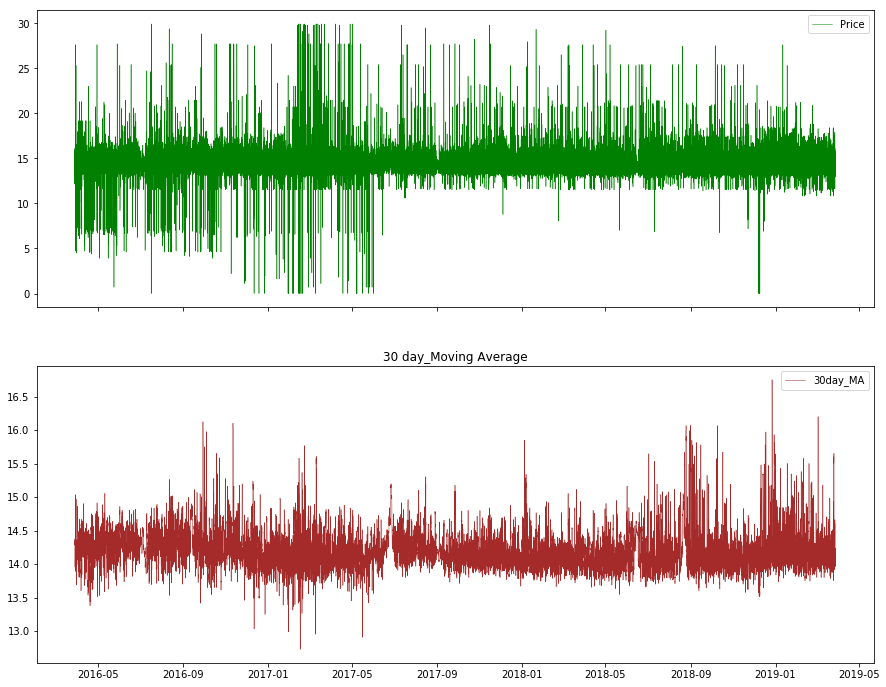

In [17]:
plot_ma(log_data, 30)

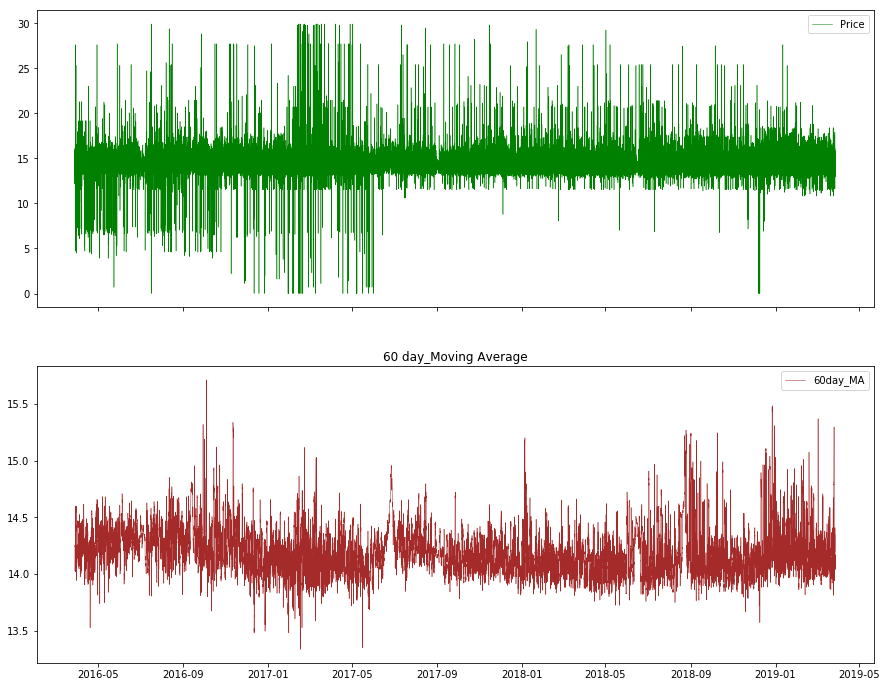

In [18]:
plot_ma(log_data, 60)

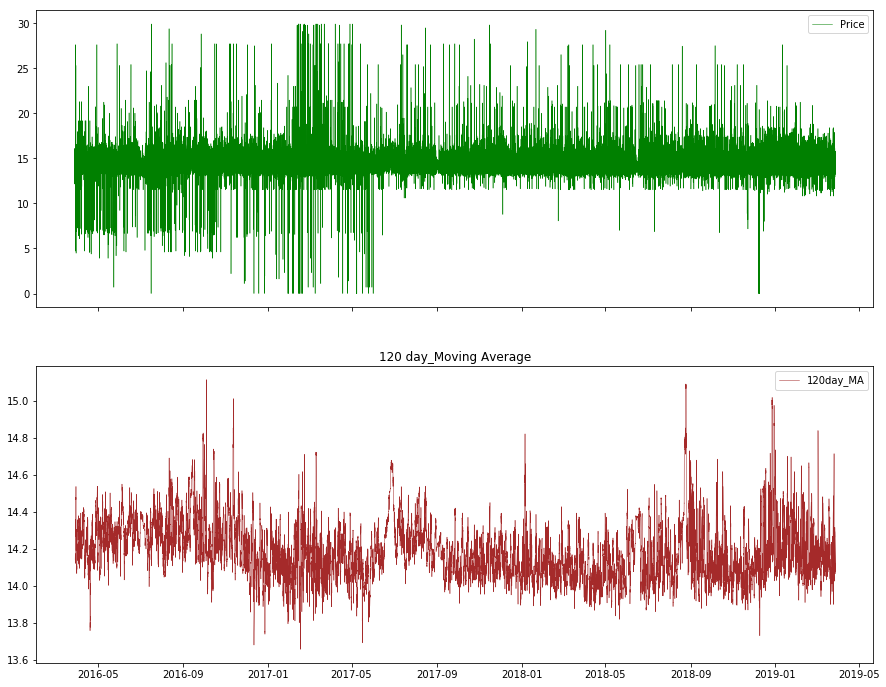

In [19]:
plot_ma(log_data, 120)

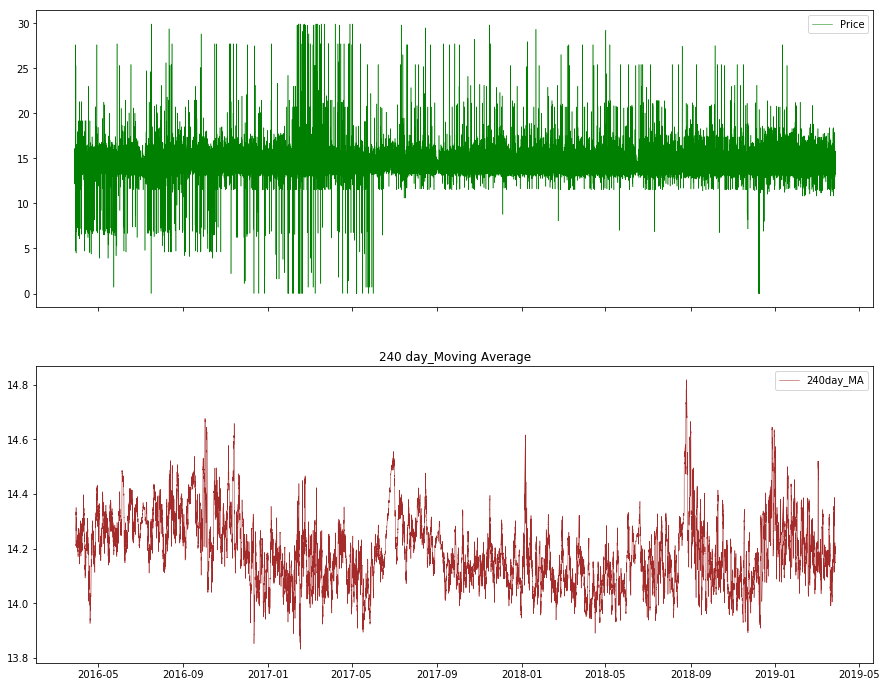

In [20]:
plot_ma(log_data, 240)

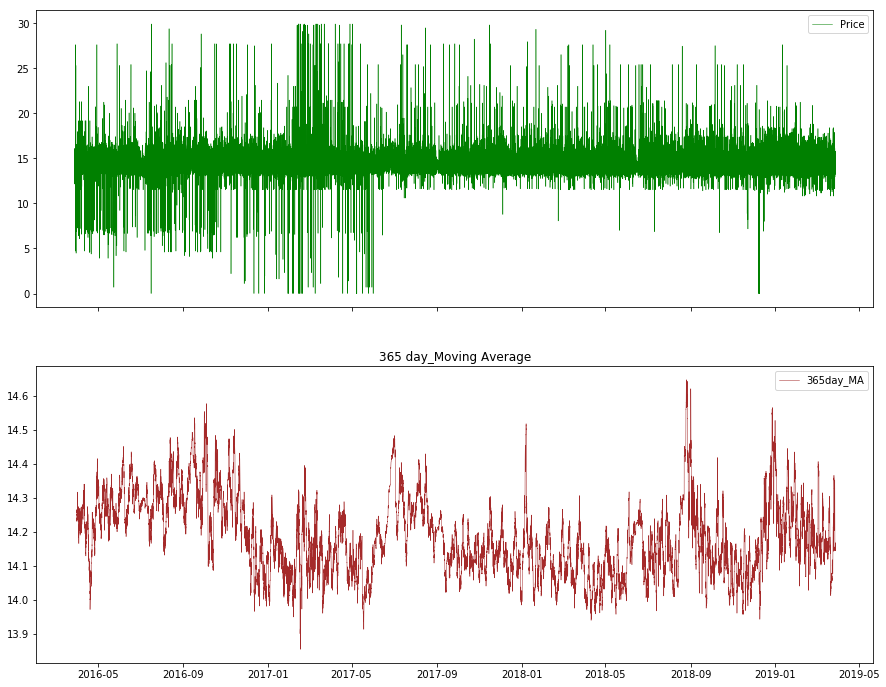

In [21]:
plot_ma(log_data, 365)

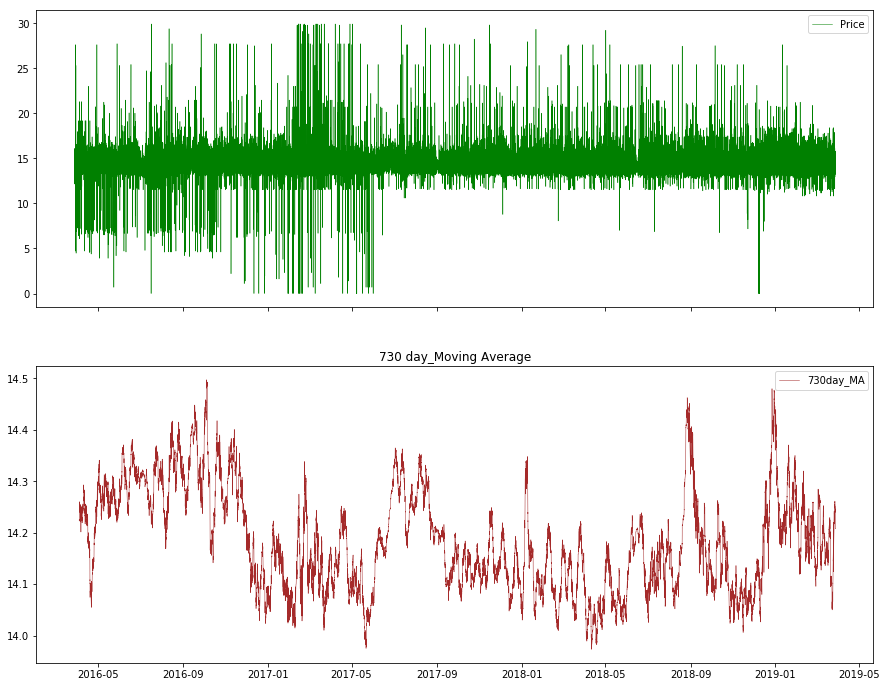

In [22]:
plot_ma(log_data, 730)

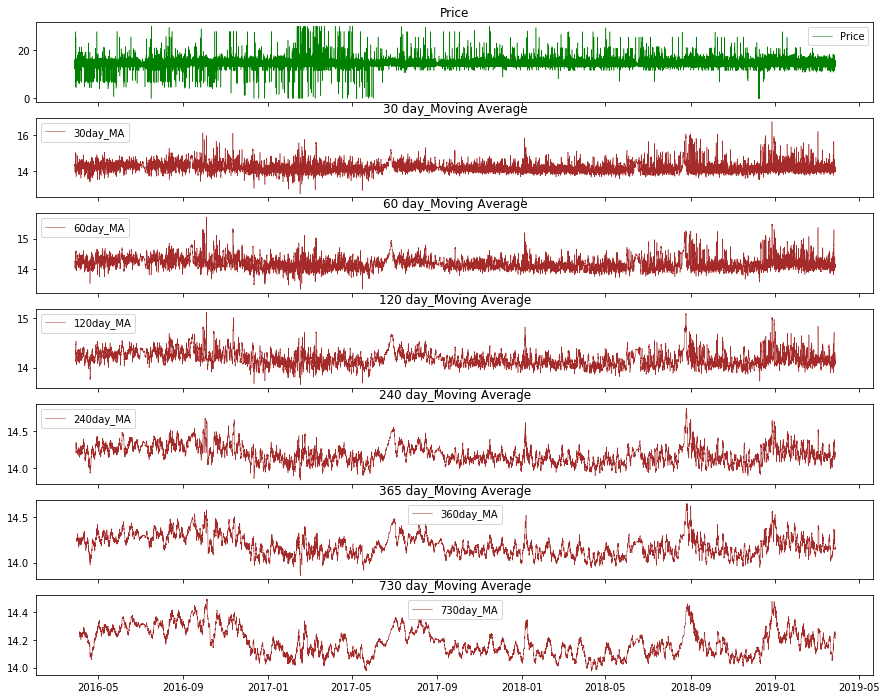

In [23]:
plot_ma_all(log_data, [30, 60, 120, 240, 365, 730])

### MOVING AVERAGE COVERGENCE DIVERGENCE

In [27]:
def ema(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return df.ewm(n).mean()
def MACD(price, n_fast, n_slow, signal):
    '''
    :Arguments:
      :n_fast: <integer> representing fast exponential
              moving average
              
      :n_slow: <integer> representing slow exponential
              moving average
              
      :signal: Signal line
      
    :Return:
      MACD: fast, slow and signal.
    '''
    
    n_fast = n_fast
    n_slow = n_slow
    signal = signal
    #defin MACD
    macd = ema(price, n_fast) - ema(price, n_slow)
    #MACD signal
    macd_signal = ema(macd, signal)
    #MACD histo
    macd_histo_ = macd - macd_signal
    return pd.DataFrame({'MACD': macd, 'MACD_HIST': macd_histo_,
                         'MACD_SIGNAL': macd_signal})

FAST = 12
SLOW = 26
SIGNAL = 9
macd = MACD(log_data.Price, FAST, SLOW, SIGNAL)

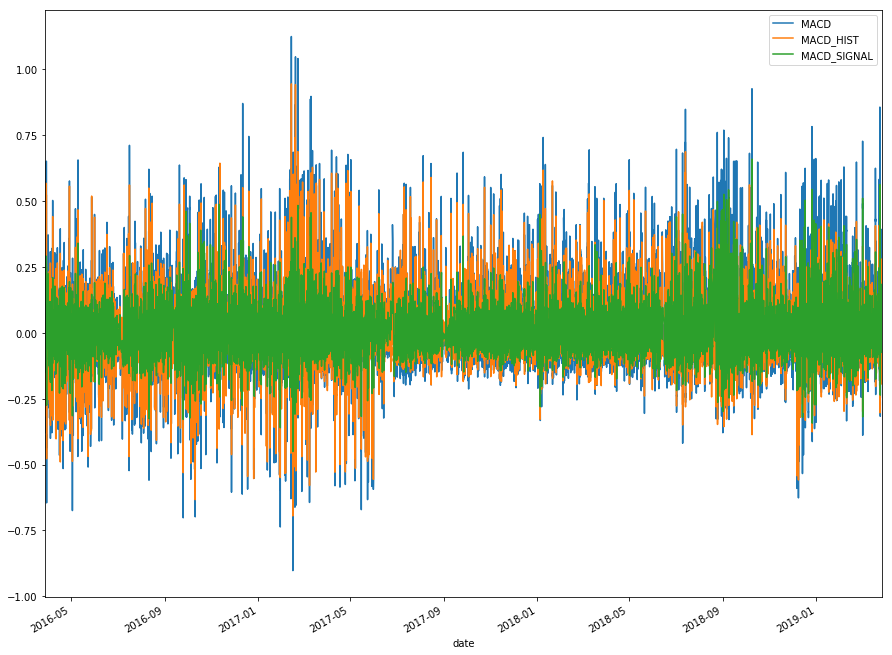

In [29]:
macd.plot()

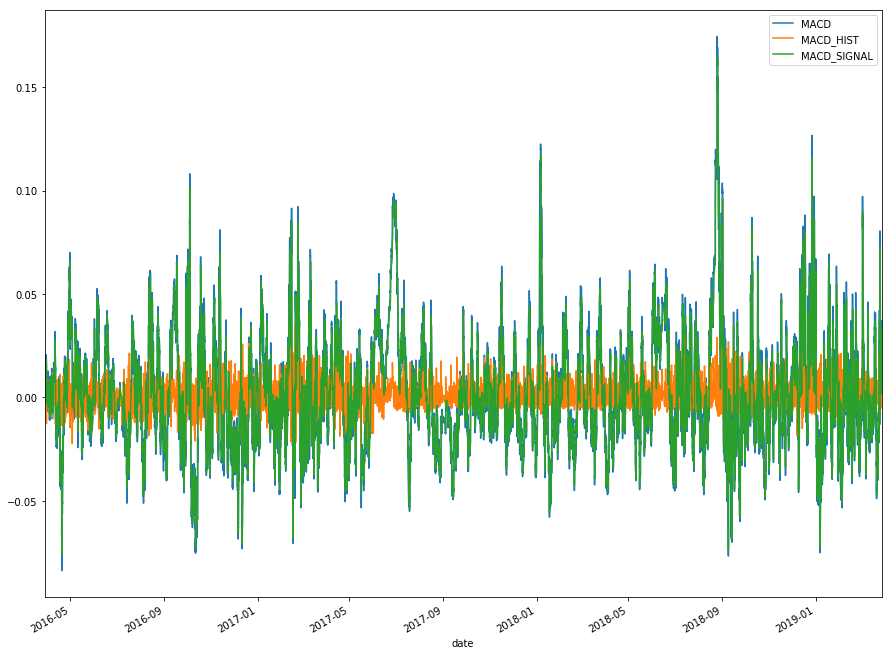

In [31]:
FAST = 365
SLOW = 765
SIGNAL = 9
macd = MACD(log_data.Price, FAST, SLOW, SIGNAL)
macd.plot()

### Feature Importance